In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pyMELTScalc as M

sys.path.append(r'H:\My Drive\2022\GitHub\pyMELTScalc\MELTS')

import time
import random

In [2]:
M.__version__

'0.0.23'

In [3]:
# Oruanui Tuff from Tramontano et al. 2017; 85 MPa
comp = {'SiO2_Liq': 75.63,
        'TiO2_Liq': 0.2,
        'Al2O3_Liq': 13.37,
        'Cr2O3_Liq': 0.0,
        'FeOt_Liq': 1.22 + 0.45*71.844/(159.69/2),
        'CaO_Liq': 1.62,
        'MgO_Liq': 0.27,
        'MnO_Liq': 0.06,
        'K2O_Liq': 2.96,
        'Na2O_Liq': 4.08,
        'P2O5_Liq': 0.02,
        'H2O_Liq': 3.5,
        'CO2_Liq': 0.002,
        'Fe3Fet_Liq': 0.4}

In [4]:
Results = M.path_MELTS(Model = "MELTSv1.2.0", 
                       comp = comp, 
                       T_end_C = 740, 
                       dt_C = 0.5, 
                       P_bar = 1750,
                       find_liquidus = True, 
                       fO2_buffer = "NNO", 
                       fO2_offset = 0)

Setting calculation mode to rhyolite-MELTS 1.2.0.
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.0
1750.

In [7]:
dv = Results['Conditions']['v']-Results['Conditions']['v'].loc[0]
v = Results['Conditions']['v']
b = Results['Conditions']['dvdp']

dp = dv/(v*b)
dp

0     -0.000000
1      0.204410
2      0.419097
3      0.635272
4      0.852947
         ...   
328    3.338042
329    3.351201
330    3.363712
331    3.375607
332    3.386917
Length: 333, dtype: float64

In [6]:
melts.engine.systemProperties

TypeError: 'NoneType' object is not callable

In [4]:
from meltsdynamic import MELTSdynamic

melts = MELTSdynamic(4)

bulk = [comp['SiO2_Liq'], comp['TiO2_Liq'], comp['Al2O3_Liq'], comp['Fe3Fet_Liq']*((159.59/2)/71.844)*comp['FeOt_Liq'], 0.0, (1- comp['Fe3Fet_Liq'])*comp['FeOt_Liq'], comp['MnO_Liq'], comp['MgO_Liq'], 0.0, 0.0, comp['CaO_Liq'], comp['Na2O_Liq'], comp['K2O_Liq'], comp['P2O5_Liq'], comp['H2O_Liq'], comp['CO2_Liq'], 0.0, 0.0, 0.0]
bulk = list(100*np.array(bulk)/np.sum(bulk))

melts.engine.setBulkComposition(bulk)
melts.engine.pressure = 1500
melts.engine.temperature = 780

melts.engine.calcEquilibriumState(1,0)

Setting calculation mode to rhyolite-MELTS 1.2.0.


In [7]:
melts.engine.getProperty("dvdp")

{'bulk': 0.003789209220105795,
 'oxygen': 0.0,
 'liquid1': -0.00023512487087778747,
 'orthopyroxene1': -1.21631607221193e-07,
 'plagioclase1': -1.9965918539308053e-05,
 'tridymite1': -5.393402724216534e-06,
 'rutile1': -4.414840172043966e-09,
 'spinel1': -1.0680675053836658e-07,
 'fluid1': -0.0012029994762399643}

In [4]:
Comp = pd.DataFrame.from_records([comp]*50)
CO2 = np.zeros(50)
H2O_Liq = np.zeros(50)
CO2_Liq = np.linspace(0.001,0.2,5)
for i in range(len(CO2_Liq)):
    CO2[i*10:i*10+10] = CO2_Liq[i]
    H2O_Liq[i*10:i*10+10] = np.linspace(0.1, 1, 10)
    
Comp['H2O_Liq'] = H2O_Liq
Comp['CO2_Liq'] = CO2

In [5]:
Results = M.multi_path(Model = "MELTSv1.2.0", comp = Comp, T_start_C = 950, T_end_C = 750, dt_C = 1,
                      P_bar = 1500, isochoric = True, fO2_buffer = "NNO", 
                       find_liquidus = True, fluid_sat = True)

  0%|          | 0/3 [00:00<?, ?it/s]

Running MELTSv1.2.0 calculations 0 to 19.0 ... Complete (time taken = 2988.33 seconds)
Running MELTSv1.2.0 calculations 20 to 39.0 ... Complete (time taken = 2988.47 seconds)
Running MELTSv1.2.0 calculations 40 to 49.0 ... Complete (time taken = 1606.83 seconds)


In [6]:
Results

{'index = 9': {'Conditions':             T_C        P_bar             h           s          v
  0    897.600000  1500.000000 -1.347590e+06  274.662289  45.999565
  1    896.602703  1499.079946 -1.347734e+06  274.542181  45.999565
  2    895.605405  1498.161111 -1.347879e+06  274.421896  45.999565
  3    894.608108  1497.243213 -1.348024e+06  274.301539  45.999565
  4    893.610811  1496.326253 -1.348169e+06  274.181111  45.999565
  ..          ...          ...           ...         ...        ...
  144  753.989189  2256.596491 -1.372303e+06  248.770482  45.999565
  145  752.991892  2270.053879 -1.372486e+06  248.532314  45.999565
  146  751.994595  2283.462101 -1.372668e+06  248.294478  45.999565
  147  750.997297  2296.817612 -1.372850e+06  248.056989  45.999565
  148  750.000000  2310.116293 -1.373032e+06  247.819863  45.999565
  
  [149 rows x 5 columns],
  'liquid1':       SiO2_Liq  TiO2_Liq  Al2O3_Liq  Cr2O3_Liq  Fe2O3_Liq   FeO_Liq  FeOt_Liq  \
  0    71.782150  0.189825  12.689

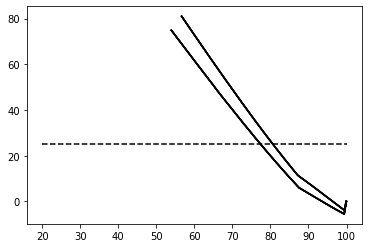

In [10]:
f, a = plt.subplots(1,1)
a.plot([20,100], [25,25], '--k')
for r in Results.keys():
    #if Results[r]['Mass']['fluid1'].loc[0]<0.1:
    if Results[r]['liquid1']['H2O_Liq'].loc[i]>3:
        a.plot(Results[r]['Mass']['liquid1'], Results[r]['All']['P_bar']/10 - 150, '-k')

In [5]:
Comp['H2O_Liq'] = np.zeros(len(Comp['SiO2_Liq']))
Comp['CO2_Liq'] = np.zeros(len(Comp['SiO2_Liq']))
Comp['Fe3Fet_Liq'] = np.zeros(len(Comp['SiO2_Liq']))

In [6]:
Comp

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Cr2O3_Liq,FeOt_Liq,CaO_Liq,MgO_Liq,MnO_Liq,K2O_Liq,Na2O_Liq,P2O5_Liq,H2O_Liq,CO2_Liq,Fe3Fet_Liq
0,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0
1,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0
2,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0
3,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0
4,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0
5,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0
6,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0
7,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0
8,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0
9,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0


In [7]:
P_bar = np.linspace(500,2500,50)
T_Liq, H2O_melt = M.findLiq_multi(Model = "MELTSv1.2.0", bulk = Comp, T_initial_C = 1200 + np.zeros(len(P_bar)), 
                                P_bar = P_bar, H2O_Liq = 20, fO2_buffer = "NNO", fO2_offset = 0.0)

  0%|          | 0/3 [00:00<?, ?it/s]

In [8]:
Comp

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Cr2O3_Liq,FeOt_Liq,CaO_Liq,MgO_Liq,MnO_Liq,K2O_Liq,Na2O_Liq,P2O5_Liq,H2O_Liq,CO2_Liq,Fe3Fet_Liq
0,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0
1,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0
2,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0
3,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0
4,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0
5,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0
6,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0
7,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0
8,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0
9,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0


In [9]:
H2O = np.random.rand(50)*(H2O_melt*Comp.sum(axis = 1)/100)/(1-H2O_melt/100)
H2O

0     2.602255
1     2.420069
2     0.099157
3     2.450678
4     2.101360
5     2.364443
6     1.259473
7     2.690506
8     2.028874
9     0.866708
10    0.363502
11    1.921542
12    3.519214
13    3.363673
14    0.605227
15    4.333783
16    0.116595
17    0.482646
18    4.479571
19    1.403520
20    2.087303
21    2.428223
22    4.499541
23    1.419123
24    3.091925
25    3.547253
26    5.103485
27    0.725775
28    0.806212
29    3.447885
30    3.766206
31    5.077229
32    2.274332
33    3.187127
34    1.010806
35    5.270146
36    2.909710
37    2.979752
38    5.036515
39    1.165385
40    5.732681
41    3.573692
42    2.541371
43    4.466076
44    4.101143
45    3.918144
46    1.959768
47    6.779393
48    7.374524
49    2.658695
dtype: float64

In [10]:
T_Liq, H2O_melt, CO2_melt = M.findCO2_multi(Model = "MELTSv1.2.0", bulk = Comp, 
                                            T_initial_C = np.zeros(len(P_bar)) + 1200+273.15, 
                                            P_bar = P_bar, H2O_Liq = H2O, fO2_buffer = "NNO", fO2_offset = 0.0)

  0%|          | 0/3 [00:00<?, ?it/s]

In [13]:
H2O_melt

array([2.33821596, 2.25734595, 0.09908941, 2.31674968, 2.02303566,
       2.26252068, 1.23770378, 2.55932271, 1.96930422, 0.85759852,
       0.3620883 , 1.87345197, 3.28732623, 3.17596846, 0.60129829,
       3.89321619, 0.11650714, 0.48029487, 4.07103229, 1.38221296,
       2.0383432 , 2.36093245, 4.16749869, 1.39822448, 2.98095789,
       3.39572636, 4.65141053, 0.7206927 , 0.79994068, 3.31483169,
       3.60449124, 4.71286999, 2.22215717, 3.08063065, 0.99817291,
       4.90153607, 2.82448623, 2.89074463, 4.73524134, 1.1491636 ,
       5.30284788, 3.44565744, 2.46386417, 4.25801537, 3.93145911,
       3.76593537, 1.91537519, 6.12240364, 6.45941597, 2.57773955])

In [12]:
Comp

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Cr2O3_Liq,FeOt_Liq,CaO_Liq,MgO_Liq,MnO_Liq,K2O_Liq,Na2O_Liq,P2O5_Liq,H2O_Liq,CO2_Liq,Fe3Fet_Liq
0,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0
1,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0
2,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0
3,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0
4,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0
5,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0
6,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0
7,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0
8,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0
9,75.63,0.2,13.37,0.0,1.624907,1.62,0.27,0.06,2.96,4.08,0.02,0.0,0.0,0.0


In [16]:
Comp['CO2_Liq'] = np.zeros(len(Comp['SiO2_Liq']))
P_bar = np.linspace(500,2500,50)
T_Liq, H2O_melt = M.findLiq_multi(Model = "MELTSv1.2.0", comp = Comp, T_initial_C = 1200 + np.zeros(len(P_bar)), 
                                P_bar = P_bar, H2O_Liq = 20, fO2_buffer = "NNO", fO2_offset = 0.0)

  0%|          | 0/3 [00:00<?, ?it/s]

In [17]:
H2O_melt

array([2.64356232, 2.77700312, 2.90449834, 3.02881569, 3.15025518,
       3.2689502 , 3.38505141, 3.49868974, 3.61007015, 3.71916118,
       3.8261872 , 3.93114829, 4.03420293, 4.1353497 , 4.23469914,
       4.33232044, 4.42828127, 4.52266579, 4.61550007, 4.70687921,
       4.79685203, 4.88547303, 4.97280395, 5.05890597, 5.14381954,
       5.22761649, 5.31032254, 5.39202091, 5.47326498, 5.55439075,
       5.63486822, 5.71473346, 5.79402039, 5.87269278, 5.95091313,
       6.02864509, 6.10583667, 6.18258782, 6.25862602, 6.33429517,
       6.40970029, 6.48468067, 6.55933698, 6.63368246, 6.70772953,
       6.78148989, 6.85497451, 6.9281937 , 7.00115715, 7.07387395])